# prody: protein dynamics and sequence analysis
http://www.bahargroup.org/prody/index.html

In [6]:
import os
import sys
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import prody


## example I

In [156]:
# Return an AtomGroup and/or dictionary containing header data parsed from a stream of PDB lines.
pdb_file = 'data/pdb5aer.ent.gz'

with gzip.open(pdb_file, 'rt') as f:
    structure = prody.parsePDBStream(f)

print(f"Loaded {structure.numAtoms()} atoms")
print(f"Chains: {set(structure.getChids())}")

# Save structure to pdb
prody.writePDB("data/5AER.pdb", structure)

Loaded 1754 atoms
Chains: {'B', 'A', 'C'}


'data/5AER.pdb'

### protein structure

In [30]:
protein = structure.select('protein')
print(type(protein))
print('number of models:', protein.numCoordsets())
print(f"Chains: {set(protein.getChids())}")

<class 'prody.atomic.selection.Selection'>
number of models: 1
Chains: {'B', 'A', 'C'}


In [49]:
# Select alpha carbons
calphas = protein.select("name CA")
print(f"{len(calphas)} residues in protein")



# Select chain A residues 50-100
chainAsub = protein.select("chain A and resnum 50 to 100")
print(chainAsub)

209 residues in protein
amino acida is 181
Selection '(chain A and re...) and (protein)'


In [65]:
# ????? keep  atom only ??
chainA = protein.select("chain A and name CA")
print(f"amino acida is {chainA}")

# Save structure to pdb
prody.writePDB("data/5AER_A.pdb", chainA)

amino acida is Selection '(chain A and na...) and (protein)'


'data/5AER_A.pdb'

In [69]:
for i in chainA[:10]:
    print(i)

Atom CA (index 1)
Atom CA (index 8)
Atom CA (index 17)
Atom CA (index 24)
Atom CA (index 31)
Atom CA (index 40)
Atom CA (index 49)
Atom CA (index 57)
Atom CA (index 64)
Atom CA (index 75)


In [84]:
# iterate atoms
for i in protein.iterAtoms():
    print(i)
    break

Atom N (index 0)


## visualization

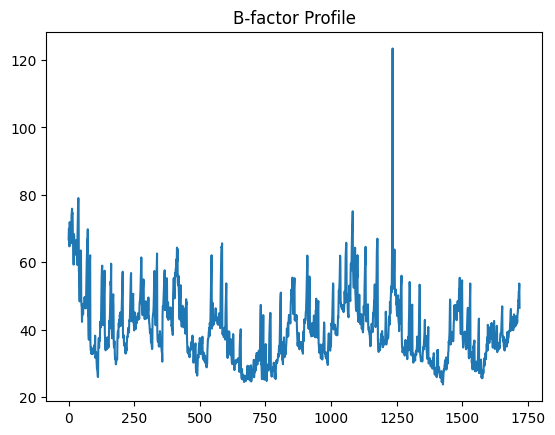

In [27]:
# Plot residue B-factors
plt.plot(protein.getBetas())
plt.title("B-factor Profile")
plt.show()

### ligand

In [164]:
# ligand = structure.select('not protein and not water')
ligand = structure.select('hetero and not water')
print('atom names:', ligand.getResnames())
print('sequence:', ligand.getSequence())
print('index of ligands', ligand.getResindices())
print('sequence number of residues:', ligand.getResnums())
print('chain id:', ligand.getChids())
print('number of atoms/residues:', ligand.numAtoms())
# one ligand
print('number of model:', ligand.numCoordsets())

atom names: ['CA' 'CA' 'CA' 'K']
sequence: XXXLYS
index of ligands [209 210 211 212]
sequence number of residues: [200 201 202 203]
chain id: ['A' 'A' 'A' 'A']
number of atoms/residues: 4
number of model: 1


In [166]:
ligand.getHierView()

<HierView: Selection 'hetero and not water' (1 chains, 4 residues)>

In [136]:
dir(ligand)

['__add__',
 '__and__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_acsi',
 '_ag',
 '_getAltlocs',
 '_getAnisous',
 '_getAnistds',
 '_getBetas',
 '_getCharges',
 '_getChids',
 '_getChindices',
 '_getCoords',
 '_getCoordsets',
 '_getData',
 '_getElements',
 '_getFlags',
 '_getFragindices',
 '_getIcodes',
 '_getIndices',
 '_getKDTree',
 '_getMasses',
 '_getNames',
 '_getOccupancies',
 '_getRadii',
 '_getResindices',
 '_getResnames',
 '_getResnums',
 '_getSecclasses',
 '_getSecids',
 '_getSecindices',
 '_getSecstrs',
 '_getSegindices',
 '_getSegnames',

## example 2

In [103]:
pdb_file = 'data/pdb2l77.ent.gz'

with gzip.open(pdb_file, 'rt') as f:
    structure = prody.parsePDBStream(f)

print('number of models:', structure.numCoordsets())

number of models: 10


In [104]:
protein = structure.select('protein')
print('chains:', set(protein.getChids()))
print('number of models:', protein.numCoordsets())

chains: {'A'}
number of models: 10


In [118]:
pdb_file = 'data/pdb2l77.ent.gz'

with gzip.open(pdb_file, 'rt') as f:
    protein = prody.parsePDBStream(f, model=1)
print('chains:', set(protein.getChids()))
print('number of models:', protein.numCoordsets())

chains: {'A'}
number of models: 1
